In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import xgboost as xgb
%matplotlib inline

In [73]:
class DataPlotter:
    def __init__(self, dataset) -> None:
        self.dataset = dataset

    def get_all_features_observed(self):
        x_train_observed = pd.read_parquet(self.dataset + '/X_train_observed.parquet')
        return x_train_observed.columns

    def get_all_features_estimated(self):
        x_train_estimated = pd.read_parquet(self.dataset + '/X_train_estimated.parquet')
        return x_train_estimated.columns
    
    def plot_feature_against_y(self, feature, observed, hour=None, month=None):
        if observed:
            y_train = pd.read_parquet(self.dataset + '/train_targets.parquet')
            x_train = pd.read_parquet(self.dataset + '/X_train_observed.parquet')
        else:
            y_train = pd.read_parquet(self.dataset + '/train_targets.parquet')
            x_train = pd.read_parquet(self.dataset + '/X_train_estimated.parquet')
        
        # Convert 'time' and 'date_forecast' columns to datetime format
        y_train['time'] = pd.to_datetime(y_train['time'])
        x_train['date_forecast'] = pd.to_datetime(x_train['date_forecast'])

        if hour and month:
            print("HOUR =", hour,"AND MONTH =", month)
            y_train_at_hour_and_month = y_train[
                (y_train['time'].dt.hour == hour) & (y_train['time'].dt.month == month)
            ]
            x_train_at_hour_and_month = x_train[
                (x_train['date_forecast'].dt.hour == hour) & (x_train['date_forecast'].dt.month == month)
            ]
            merged_df = pd.merge(
                y_train_at_hour_and_month, x_train_at_hour_and_month,
                left_on='time', right_on='date_forecast'
            )
        elif hour and not month:
            print("HOUR =", hour)
            y_train_at_hour = y_train[y_train['time'].dt.hour == hour]
            x_train_at_hour = x_train[x_train['date_forecast'].dt.hour == hour]
            merged_df = pd.merge(
                y_train_at_hour, x_train_at_hour, left_on='time', right_on='date_forecast'
            )
        elif month and not hour:
            print("MONTH =", month)
            y_train_at_month = y_train[y_train['time'].dt.month == month]
            x_train_at_month = x_train[x_train['date_forecast'].dt.month == month]
            merged_df = pd.merge(
                y_train_at_month, x_train_at_month, left_on='time', right_on='date_forecast'
            )
        elif not month and not hour:
            print(y_train.columns)
            merged_df = pd.merge(y_train , x_train, left_on='time', right_on='date_forecast')

        plt.figure(figsize=(8, 5))
        plt.scatter(merged_df[feature], merged_df['pv_measurement'], alpha=1)
        plt.xlabel(feature)
        plt.ylabel('PV Measurement')
        plt.title(feature + ' vs PV Measurement')
        plt.grid(True)
        plt.show()
    
    def plot_all_features(self, observed, hour=None, month=None):
        if observed:
            print("ALL FEATURES PLOTTED FROM OBSERVED DATASET FROM LOCATION " + self.dataset + ".")
            for feature in self.get_all_features_observed():
                self.plot_feature_against_y(feature, observed=True, hour=hour, month=month)
        else:
            print("ALL FEATURES PLOTTED FROM ESTIMATED DATASET FROM LOCATION " + self.dataset + ".")
            for feature in self.get_all_features_estimated():
                self.plot_feature_against_y(feature, observed=False, hour=hour, month = month)

ALL FEATURES PLOTTED FROM OBSERVED DATASET FROM LOCATION B.
Index(['time', 'pv_measurement'], dtype='object')


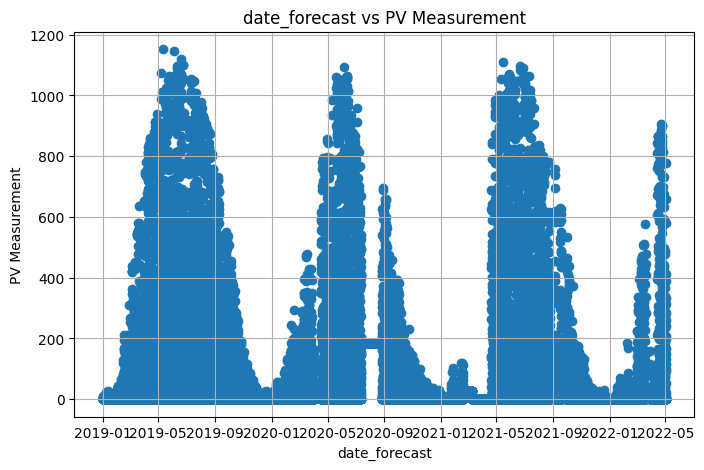

Index(['time', 'pv_measurement'], dtype='object')


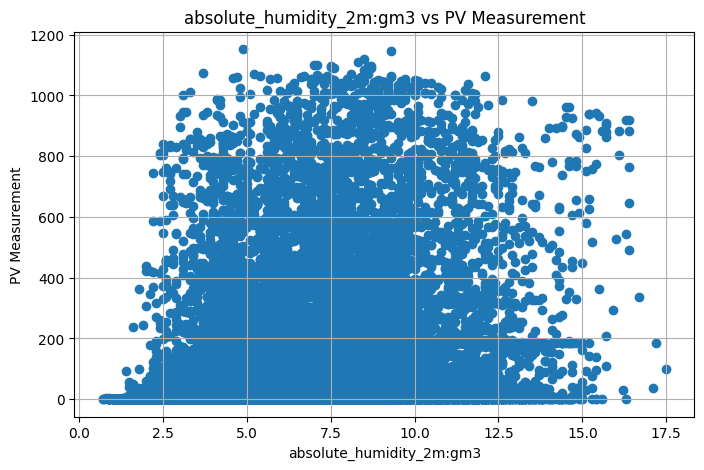

Index(['time', 'pv_measurement'], dtype='object')


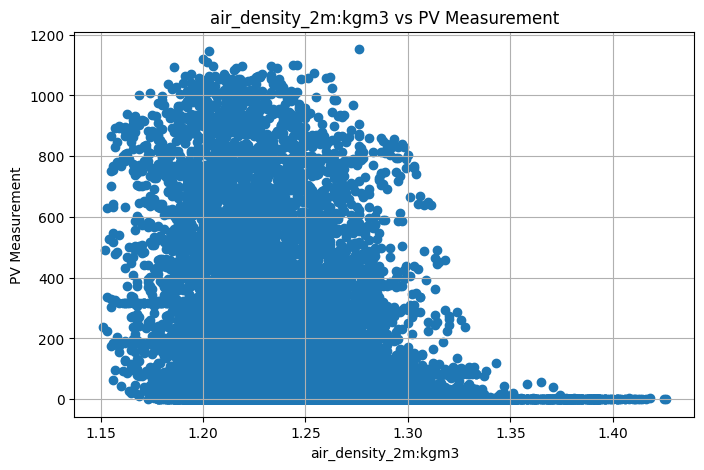

Index(['time', 'pv_measurement'], dtype='object')


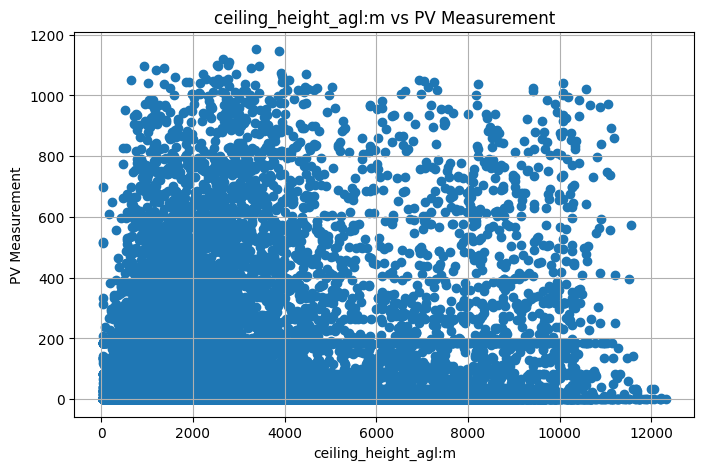

Index(['time', 'pv_measurement'], dtype='object')


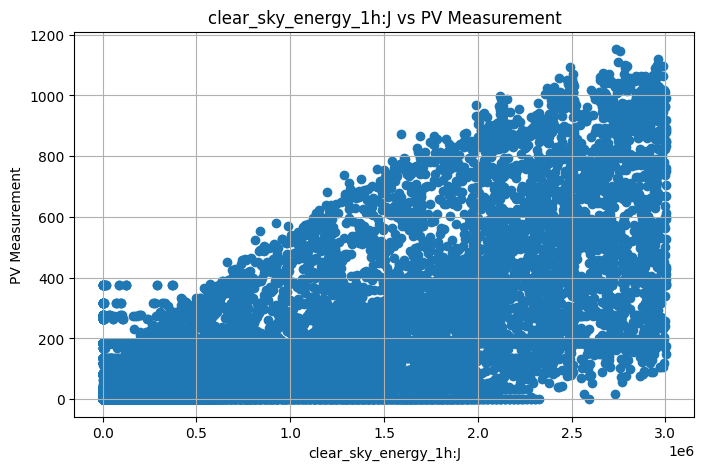

Index(['time', 'pv_measurement'], dtype='object')


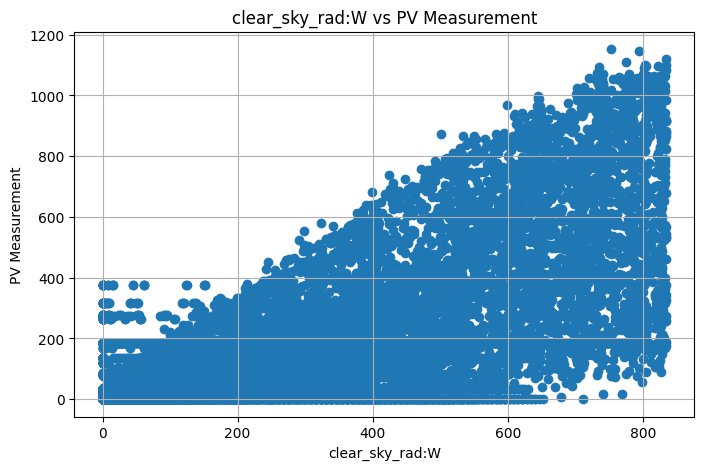

Index(['time', 'pv_measurement'], dtype='object')


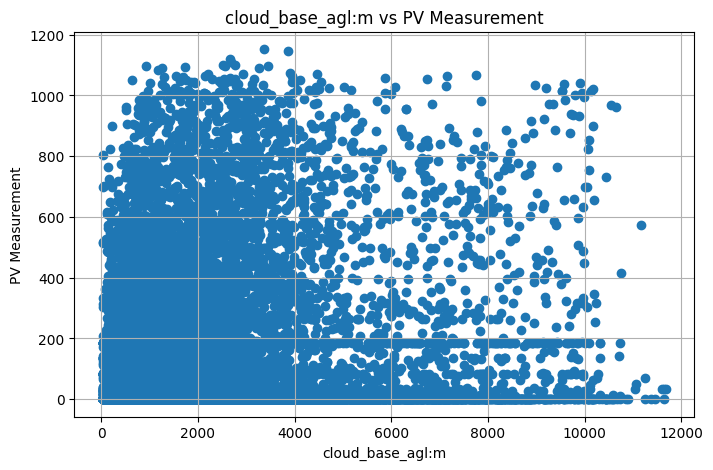

Index(['time', 'pv_measurement'], dtype='object')


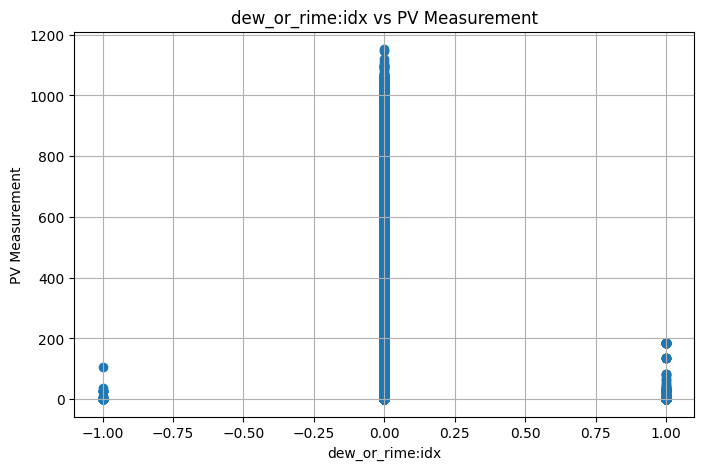

Index(['time', 'pv_measurement'], dtype='object')


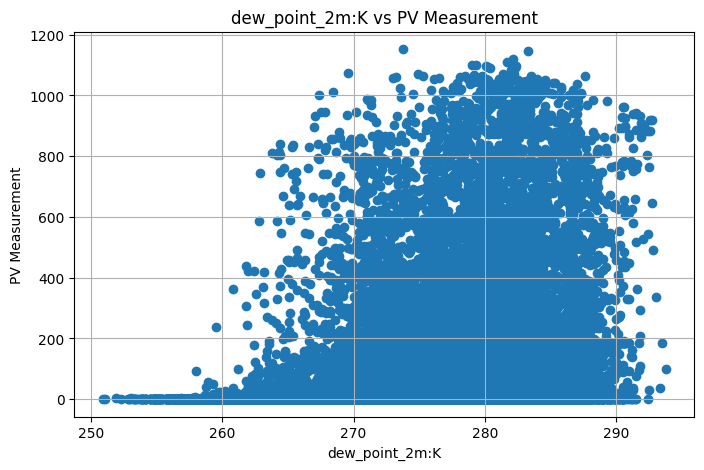

Index(['time', 'pv_measurement'], dtype='object')


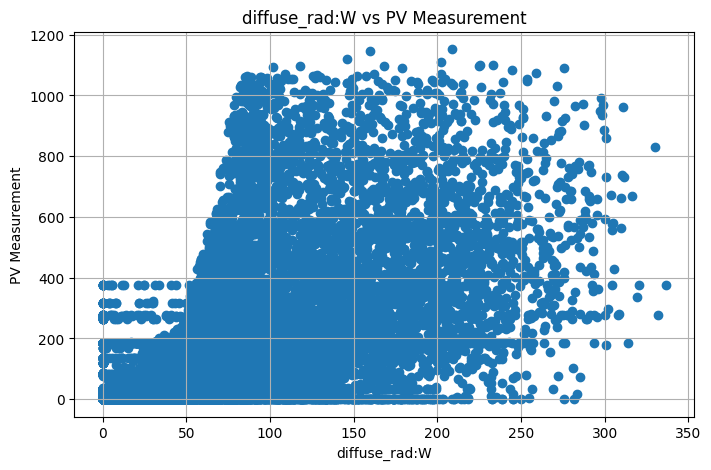

Index(['time', 'pv_measurement'], dtype='object')


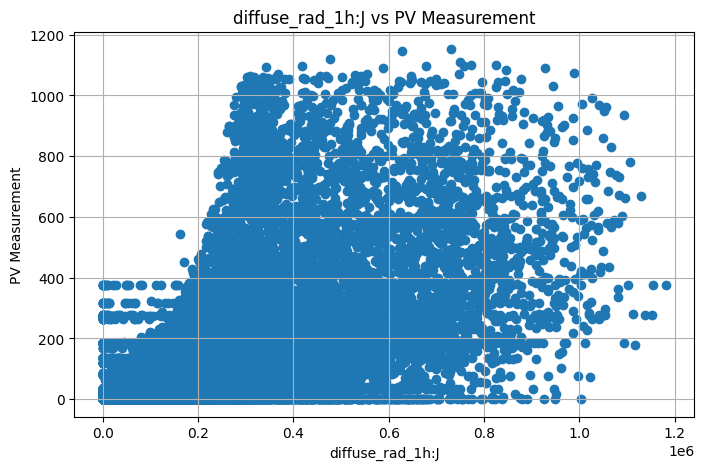

Index(['time', 'pv_measurement'], dtype='object')


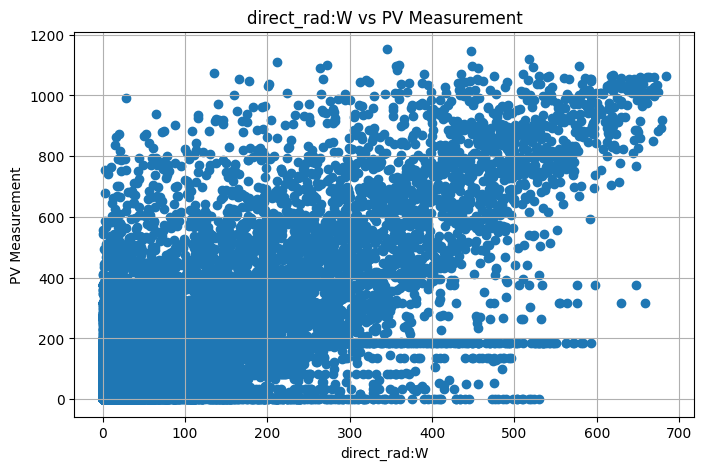

Index(['time', 'pv_measurement'], dtype='object')


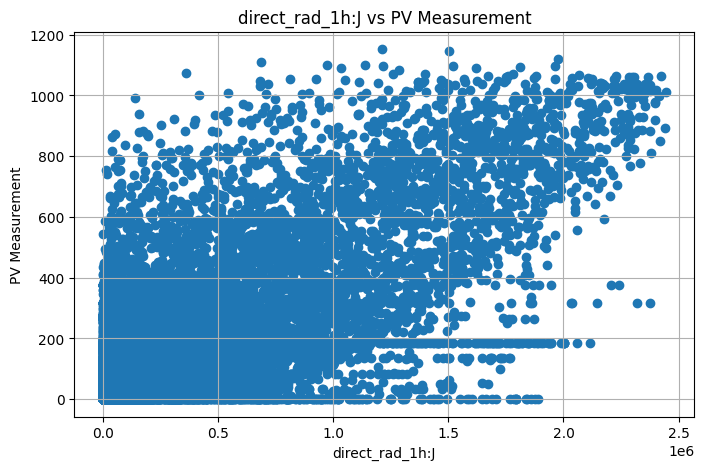

Index(['time', 'pv_measurement'], dtype='object')


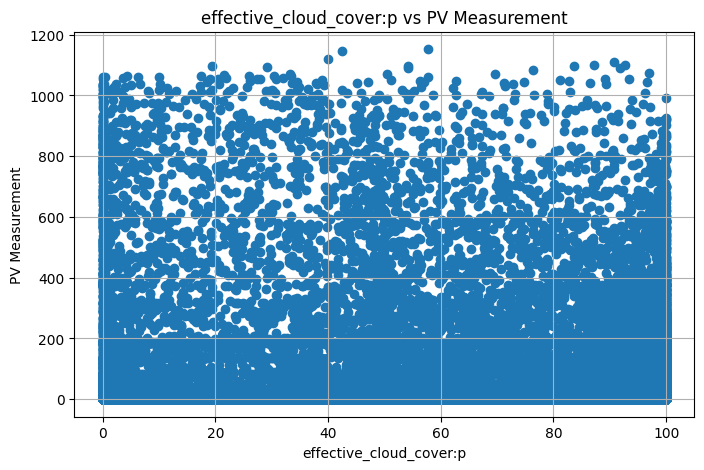

Index(['time', 'pv_measurement'], dtype='object')


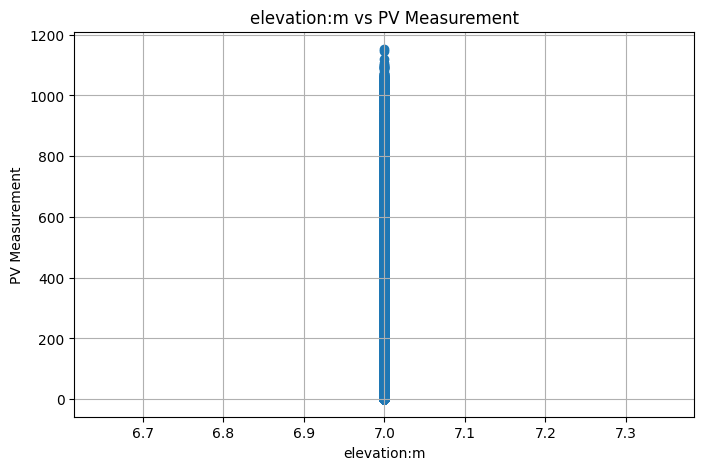

Index(['time', 'pv_measurement'], dtype='object')


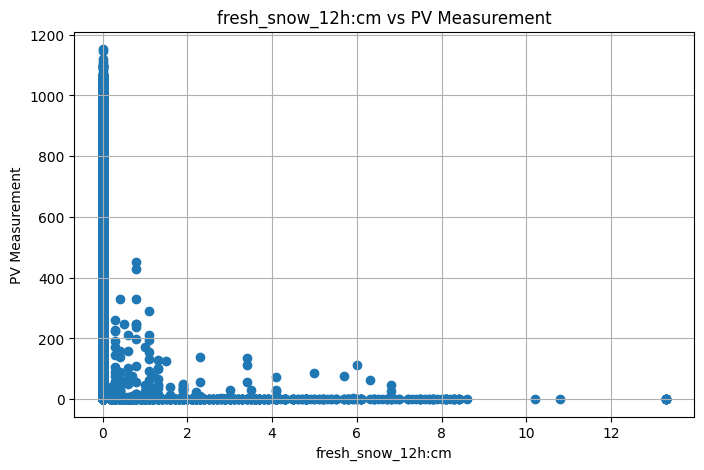

Index(['time', 'pv_measurement'], dtype='object')


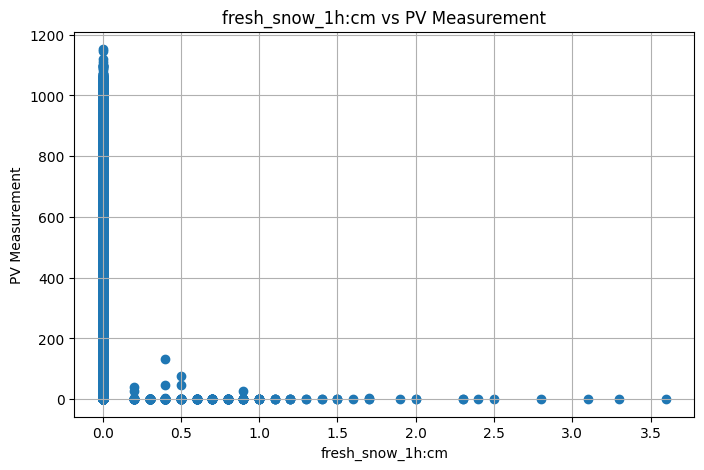

Index(['time', 'pv_measurement'], dtype='object')


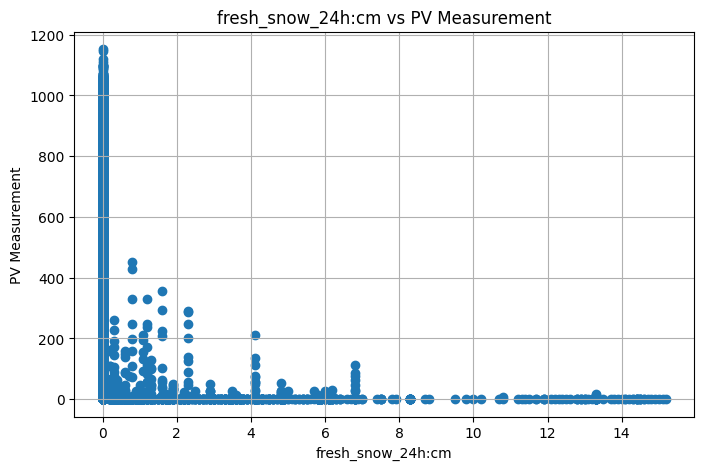

Index(['time', 'pv_measurement'], dtype='object')


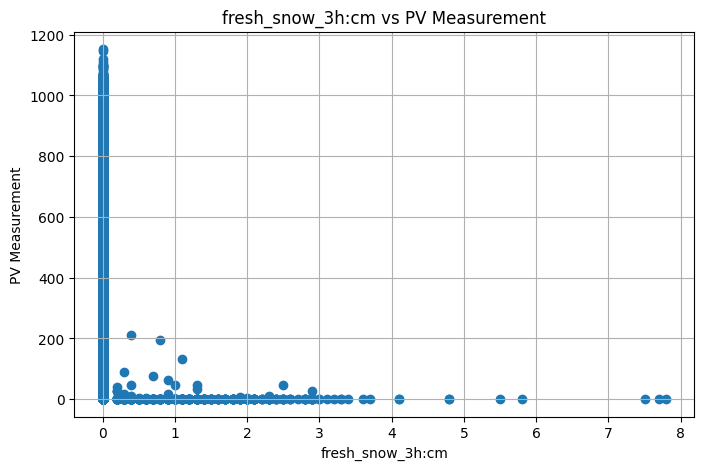

Index(['time', 'pv_measurement'], dtype='object')


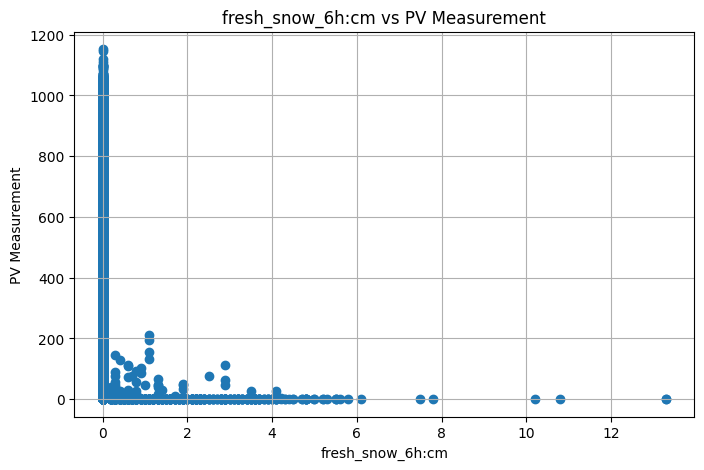

Index(['time', 'pv_measurement'], dtype='object')


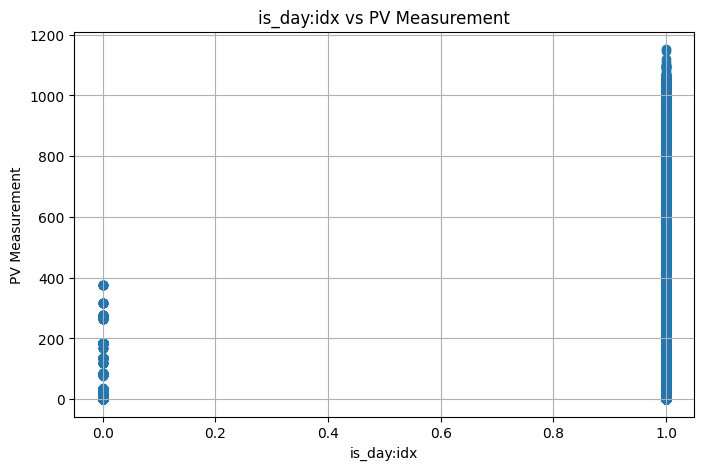

Index(['time', 'pv_measurement'], dtype='object')


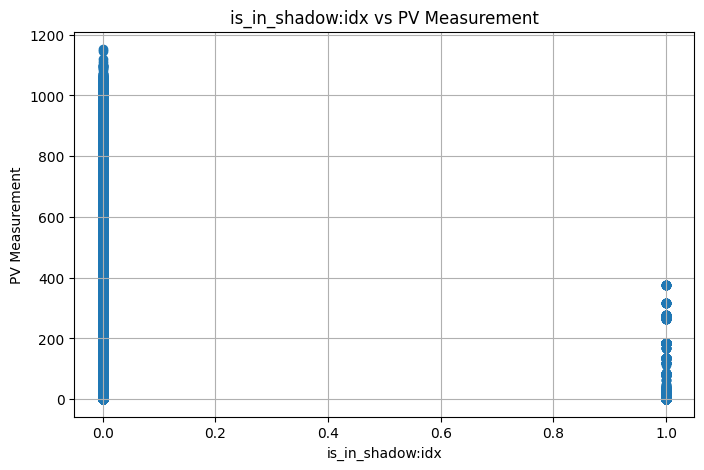

Index(['time', 'pv_measurement'], dtype='object')


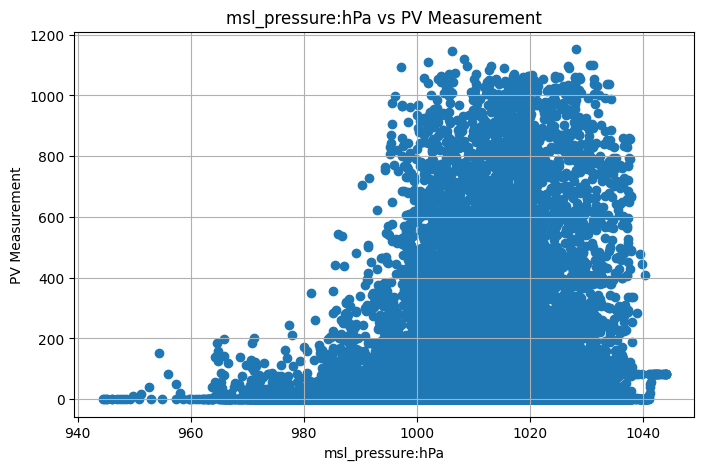

Index(['time', 'pv_measurement'], dtype='object')


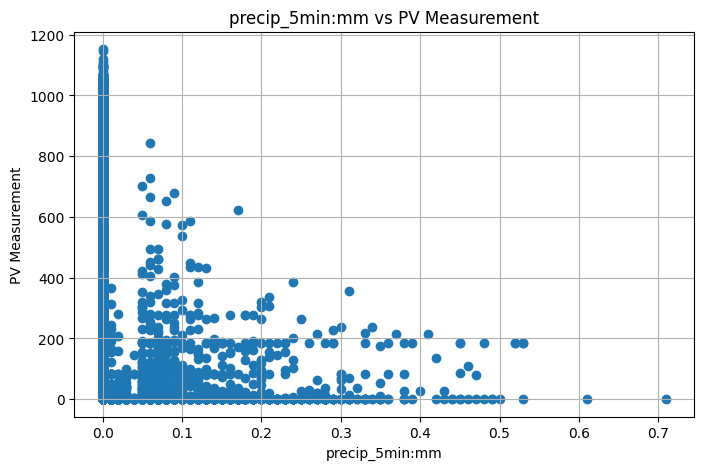

Index(['time', 'pv_measurement'], dtype='object')


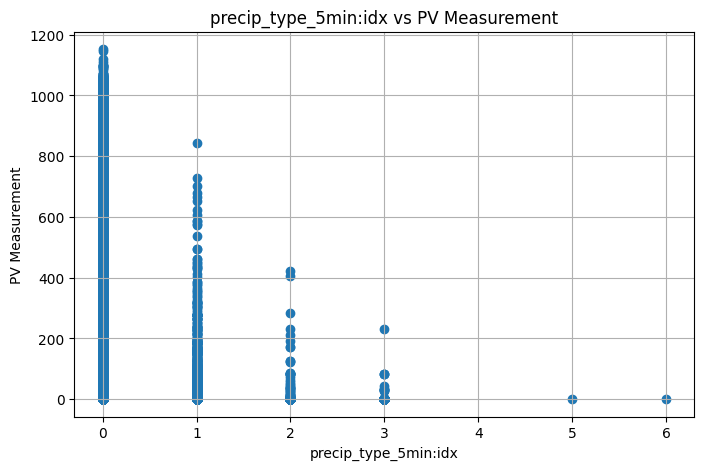

Index(['time', 'pv_measurement'], dtype='object')


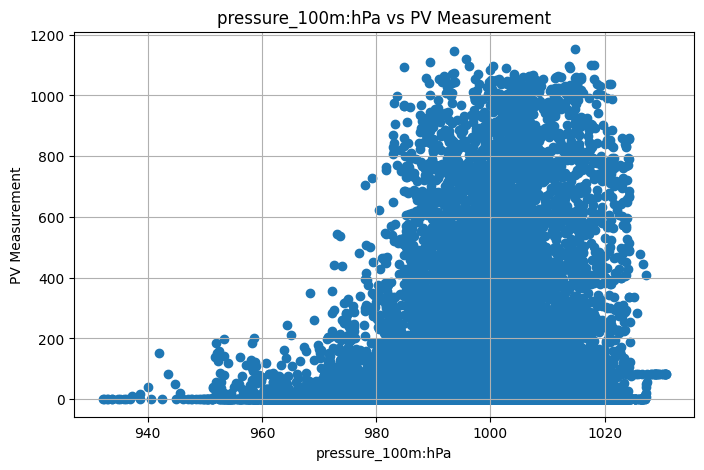

Index(['time', 'pv_measurement'], dtype='object')


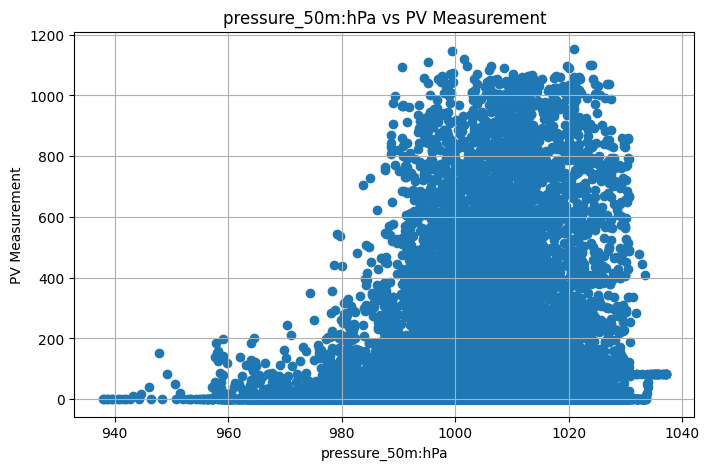

Index(['time', 'pv_measurement'], dtype='object')


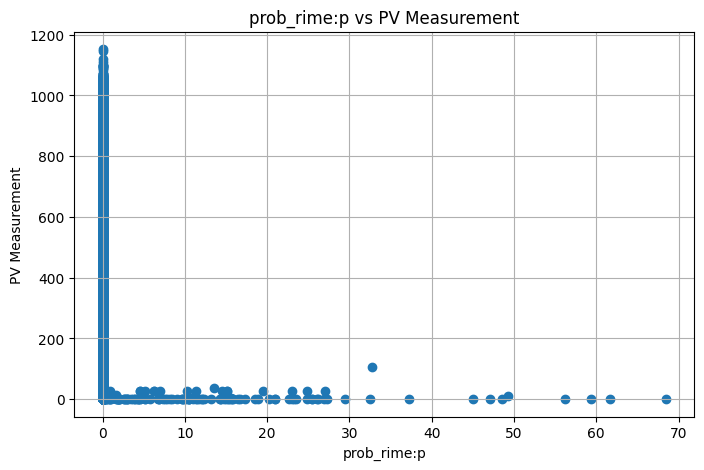

Index(['time', 'pv_measurement'], dtype='object')


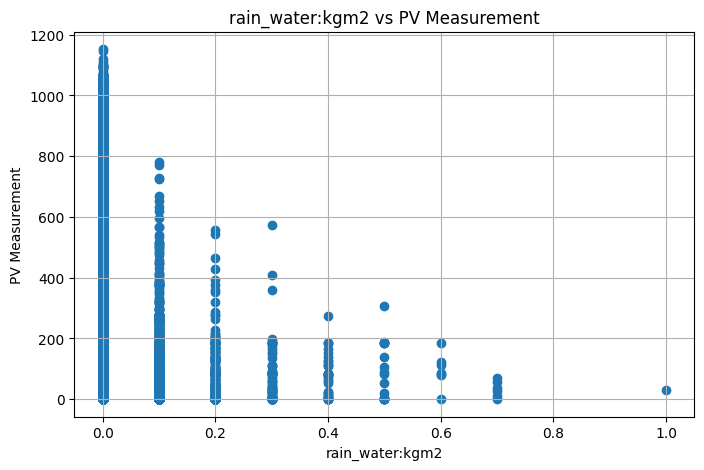

Index(['time', 'pv_measurement'], dtype='object')


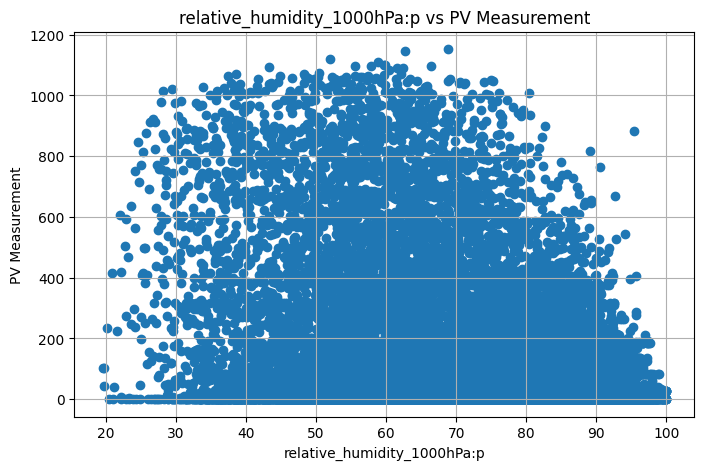

Index(['time', 'pv_measurement'], dtype='object')


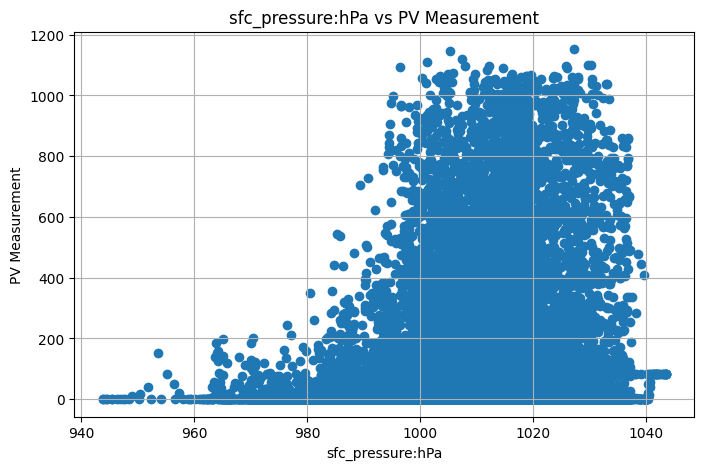

Index(['time', 'pv_measurement'], dtype='object')


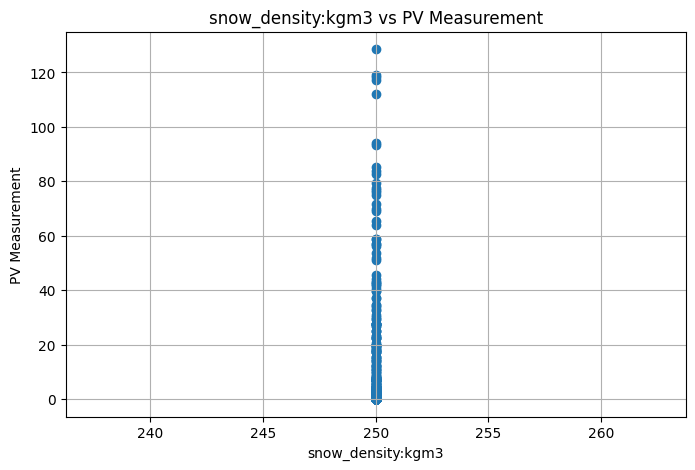

Index(['time', 'pv_measurement'], dtype='object')


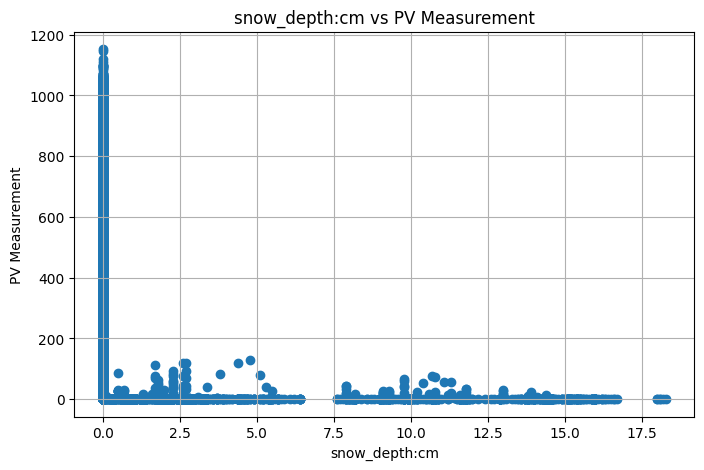

Index(['time', 'pv_measurement'], dtype='object')


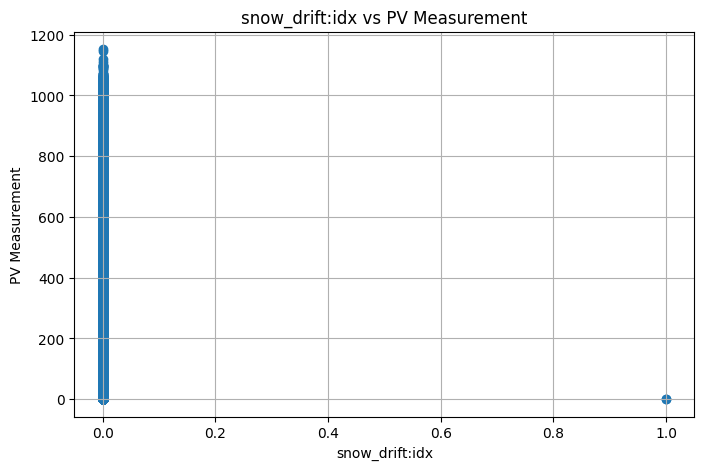

Index(['time', 'pv_measurement'], dtype='object')


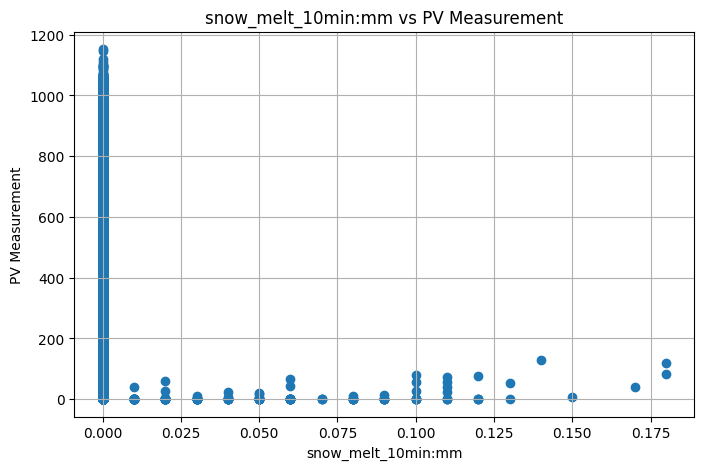

Index(['time', 'pv_measurement'], dtype='object')


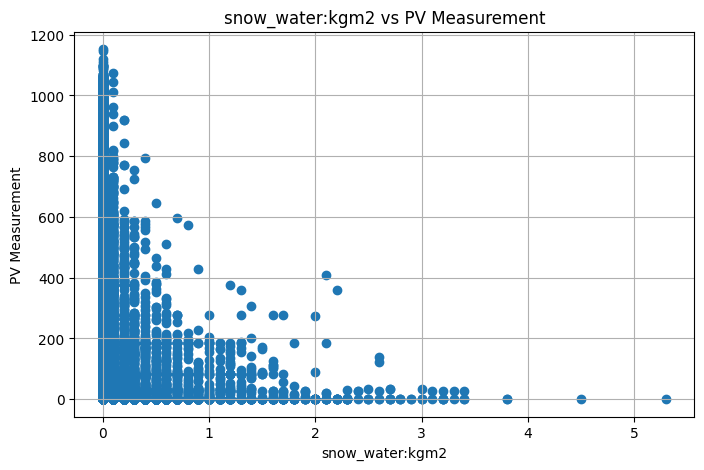

Index(['time', 'pv_measurement'], dtype='object')


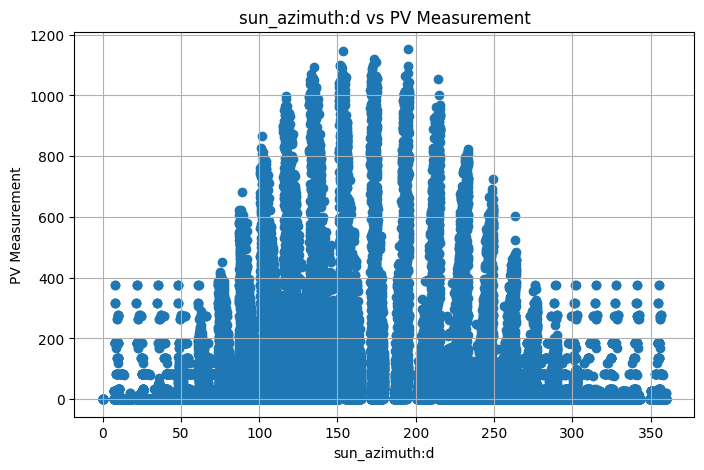

Index(['time', 'pv_measurement'], dtype='object')


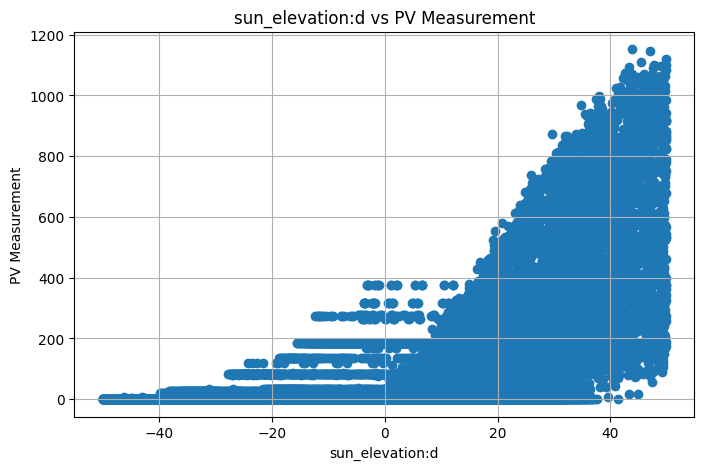

Index(['time', 'pv_measurement'], dtype='object')


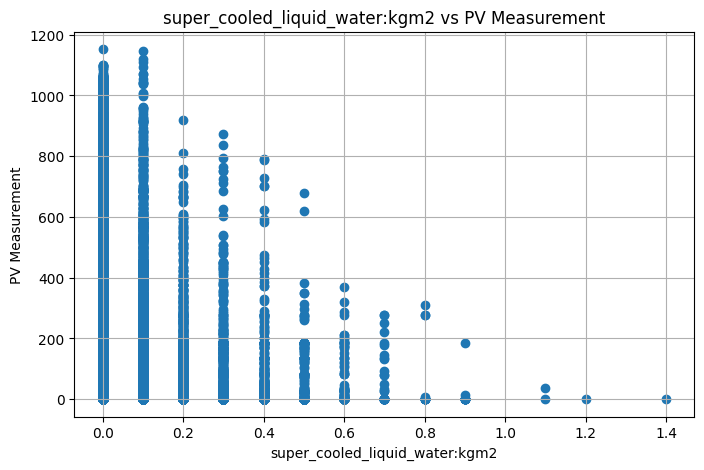

Index(['time', 'pv_measurement'], dtype='object')


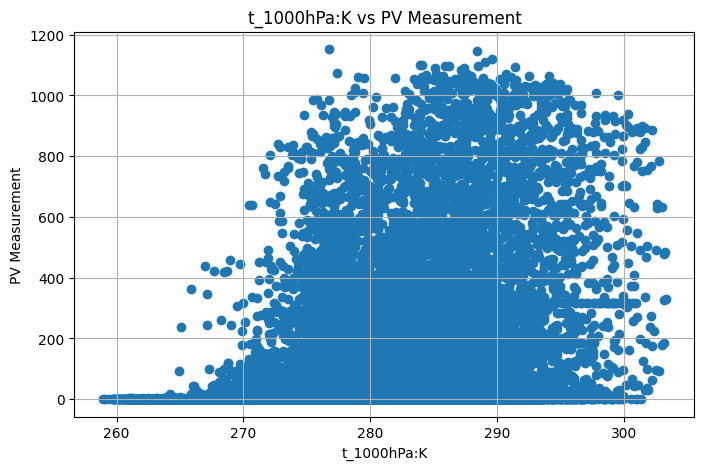

Index(['time', 'pv_measurement'], dtype='object')


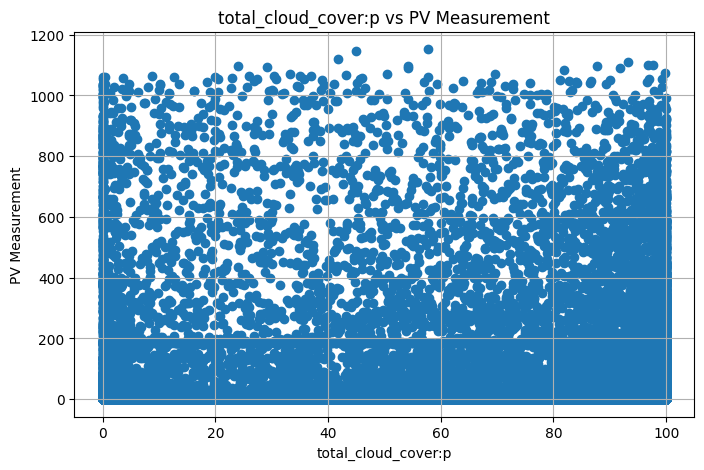

Index(['time', 'pv_measurement'], dtype='object')


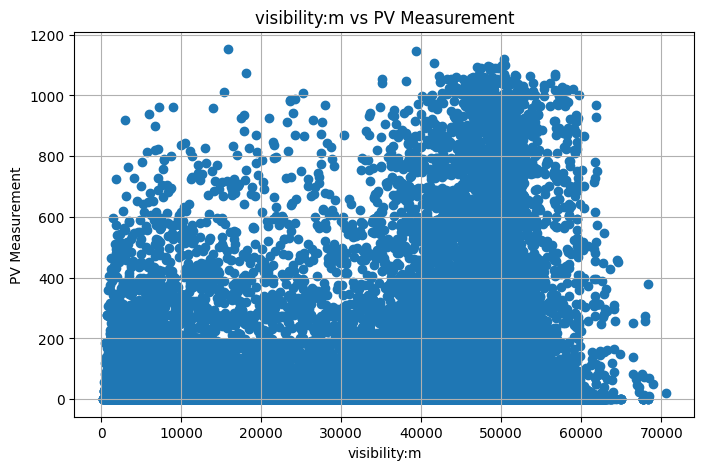

Index(['time', 'pv_measurement'], dtype='object')


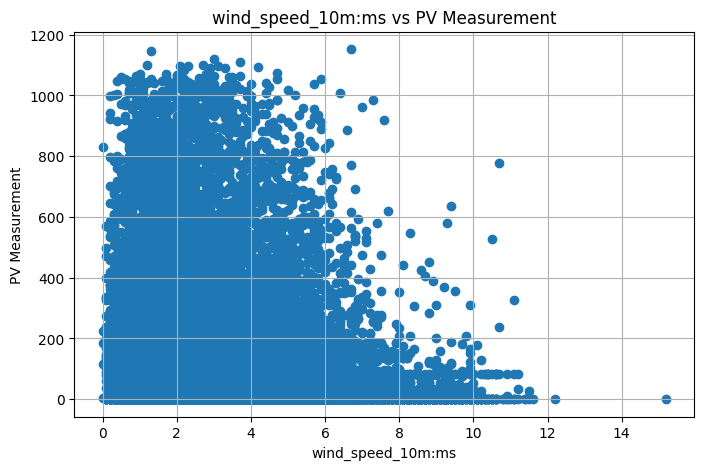

Index(['time', 'pv_measurement'], dtype='object')


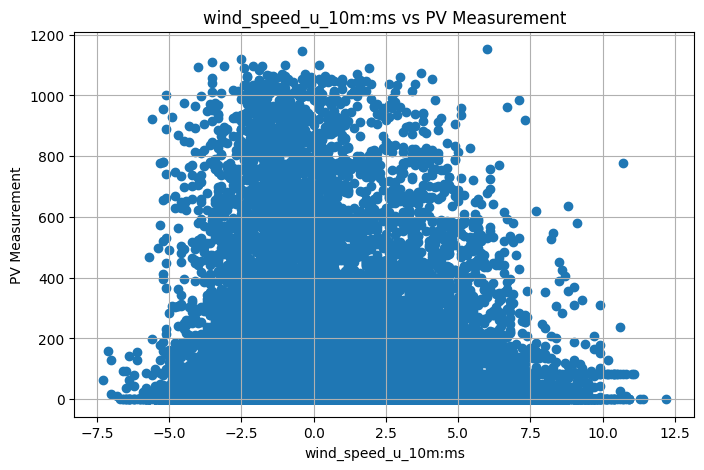

Index(['time', 'pv_measurement'], dtype='object')


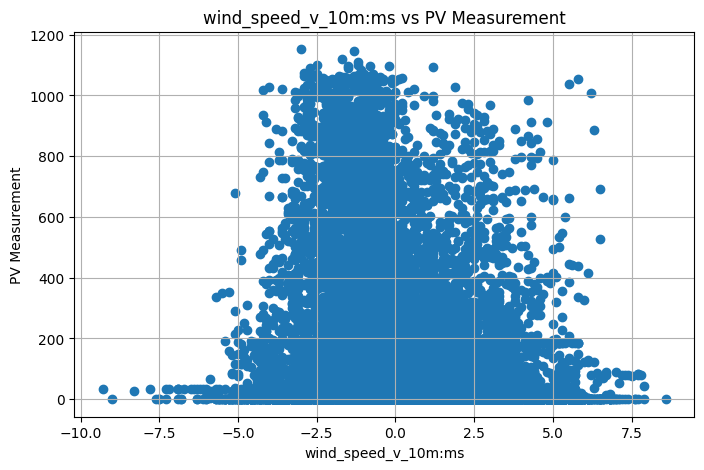

Index(['time', 'pv_measurement'], dtype='object')


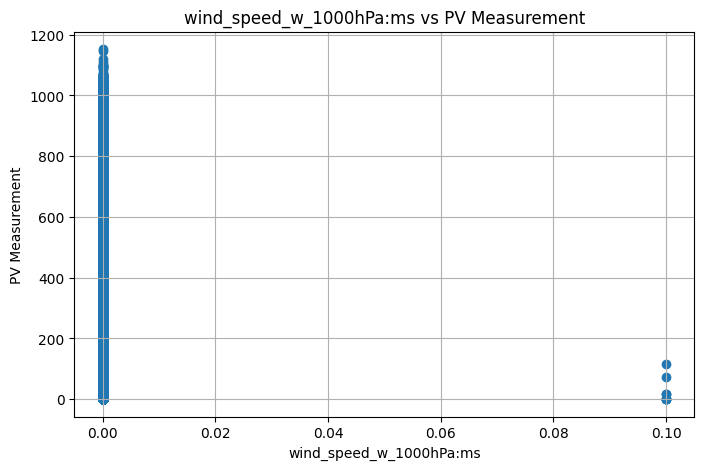

In [76]:
# Choose what dataset you want your values from (observed = False gets the estimated dataset).
# Spesify hour (example: 12) and/or month (example: 6)

dataset = 'B'
observed = True
hour = 12
month = None

plotter = DataPlotter(dataset)
plotter.plot_all_features(observed=observed, hour=None, month=None)